In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import viridis
import matplotlib.gridspec as gridspec
os.chdir('for_pub/Figure_1')
from Figure_1_module import *

<Figure size 800x1100 with 0 Axes>

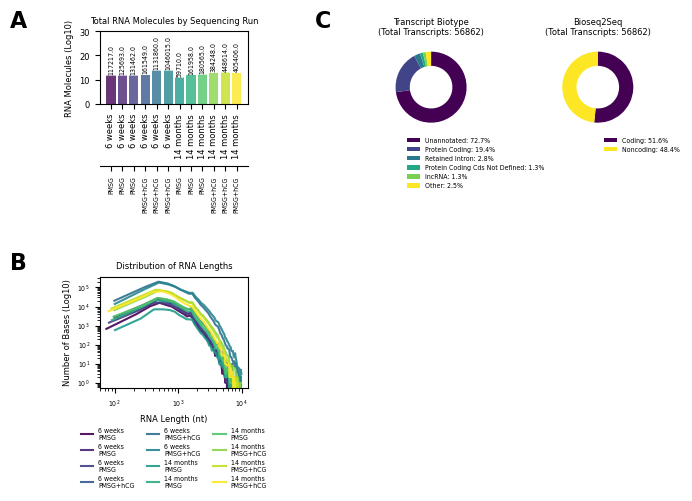

In [2]:
summary_file_path_1 = 'data_files/sequencing_summary_FAS43360_fd43997f.txt'
summary_file_path_2 = 'data_files/sequencing_summary_FAS42947_2d248329.txt'
summary_file_path_3 = 'data_files/sequencing_summary_FAS43473_87772f86.txt'
summary_file_path_4 = 'data_files/sequencing_summary_FAK19717_91726246.txt'
summary_file_path_5 = 'data_files/sequencing_summary_FAK25584_8ce47f6b.txt'
summary_file_path_6 = 'data_files/sequencing_summary_FAK12026_2a89edfc.txt'
summary_file_path_7 = 'data_files/sequencing_summary_FAS61745_1c661e5b.txt'
summary_file_path_8 = 'data_files/sequencing_summary_FAS43306_1df6042f.txt'
summary_file_path_9 = 'data_files/sequencing_summary_FAS62002_30e41b05.txt'
summary_file_path_10 = 'data_files/sequencing_summary_FAK19303_9296ec6a.txt'
summary_file_path_11 = 'data_files/sequencing_summary_FAK25596_b446fd81.txt'
summary_file_path_12 = 'data_files/sequencing_summary_FAK25509_0e62eca4.txt'

file_path = [summary_file_path_1,summary_file_path_2,summary_file_path_3,
                summary_file_path_4,summary_file_path_5,summary_file_path_6,
                summary_file_path_7,summary_file_path_8,summary_file_path_9,
                summary_file_path_10,summary_file_path_11,summary_file_path_12]

# Set the font family to 'sans-serif'
plt.rcParams['font.family'] = 'sans-serif'

# Prioritize 'Arial' within the 'sans-serif' font list
plt.rcParams['font.sans-serif'] = ['Arial'] + plt.rcParams['font.sans-serif']


# Create the figure
fig = plt.figure(figsize=(8, 11))
# Define the grid layout
gs=gridspec.GridSpec(4, 12, height_ratios=[1,1,1,1], hspace=1.2,wspace=.2, figure=fig)

# First column subplots (A)
nested_gs = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0, 1:4])
axA = fig.add_subplot(nested_gs[0:2, 0])
#axA2 = fig.add_subplot(nested_gs[1, 0])

# First column subplots (B)
nested_gs = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[1, 1:4])
axB = fig.add_subplot(nested_gs[0:3, 0])


# Nested subplots for C
nested_gs = gridspec.GridSpecFromSubplotSpec(10, 2, subplot_spec=gs[0, 6:12])
axC1 = fig.add_subplot(nested_gs[1:9, 0])
axC2 = fig.add_subplot(nested_gs[1:9, 1])


seq_output(file_path,ax=axA,base_size=6)

seqlengths = plot_seq_length(file_path,ax=axB,base_size=6)

df = annotate_transcripts(
    'data_files/all.flair.collapse.isoforms_event_label.gtf',
    'data_files/ensembl_mouse_ids.tsv',
    'data_files/translation_start_stops.csv'
)

# Plot the result
plot_biotype(df, table=True, ax1=axC1, ax2=axC2, base_size=6,cutoff=0.01)


fig.text(0.10, 0.90, 'A', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.48, 0.90, 'C', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.10, 0.68, 'B', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.savefig('figure_files/Figure_1.pdf', dpi=600)
fig.savefig('figure_files/Figure_1.png', dpi=600)
plt.show()

In [ ]:
 mean_and_sem_numpy(np.concatenate(seqlengths))